Student Name: Shehreyar Ali
Student ID: sa03576
Student Email: sa03576@st.habib.edu.pk


## Case Study 1: Google Play Store apps and reviews
<p>Mobile apps are everywhere. They are easy to create and can be lucrative. Because of these two factors, more and more apps are being developed. In this notebook, we will do a comprehensive analysis of the Android app market by comparing over ten thousand apps in Google Play across different categories. We'll look for insights in the data to devise strategies to drive growth and retention.</p>
<p><img style="width:50%" src="https://assets.datacamp.com/production/project_619/img/google_play_store.png" alt="Google Play logo"></p>
<p>Let's take a look at the data, which consists of two files:</p>
<ul>
<li><code>apps.csv</code>: contains all the details of the applications on Google Play. There are 13 features that describe a given app.</li>
<li><code>user_reviews.csv</code>: contains 100 reviews for each app, <a href="https://www.androidpolice.com/2019/01/21/google-play-stores-redesigned-ratings-and-reviews-section-lets-you-easily-filter-by-star-rating/">most helpful first</a>. The text in each review has been pre-processed and attributed with three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity.</li>
</ul>

## 1. Import Data

In [1]:
!pip install pandas

  Using cached https://files.pythonhosted.org/packages/f0/ac/92c3d2f0b627efbd1a7b2156faa697f9c2bbd7b0fe83ba8a9d36f982156f/pandas-0.25.3-cp36-cp36m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/e7/f9/f0b53f88060247251bf481fa6ea62cd0d25bf1b11a87888e53ce5b7c8ad2/pytz-2019.3-py2.py3-none-any.whl


Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\program files (x86)\\microsoft visual studio\\shared\\python36_64\\Lib\\site-packages\\pytz'
Consider using the `--user` option or check the permissions.

You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [3]:
import pandas as pd
apps_with_duplicates = pd.read_csv('datasets/apps.csv')

# Drop duplicates
apps = apps_with_duplicates.drop_duplicates()

# Print the total number of apps
print('Total number of apps in the dataset = ',len(apps) )

# Have a look at a random sample of 5 entries
n = 5


print(apps.sample(n))


Total number of apps in the dataset =  9659
      Unnamed: 0                                               App  \
3495        4395                      Guns'n'Glory Zombies Premium   
2063        2613  Nextdoor - Local neighborhood news & classifieds   
3545        4449                             P Icon Pack for Pixel   
5610        6636                                           RoboPad   
881         1092        Even - organize your money, get paid early   

             Category  Rating  Reviews  Size    Installs  Type  Price  \
3495           FAMILY     4.1      313   34M      5,000+  Paid  $2.99   
2063           SOCIAL     4.3    51502   20M  5,000,000+  Free      0   
3545  PERSONALIZATION     4.4       38   51M      1,000+  Free      0   
5610           FAMILY     4.6       41  9.2M      1,000+  Free      0   
881           FINANCE     4.8    12304   21M    100,000+  Free      0   

     Content Rating           Genres    Last Updated Current Ver   Android Ver  
3495   Everyone

Total number of apps in the data set are 9659, and they are being split up into different columns each showing a different attribute of the app

## 2. Data cleaning
<p>The three features that we will be working with most frequently henceforth are <code>Installs</code>, <code>Size</code>, and <code>Price</code>. A careful glance of the dataset reveals that some of these columns mandate data cleaning in order to be consumed by code we'll write later. Specifically, the presence of special characters (<code>, $ +</code>) and letters (<code>M k</code>) in the <code>Installs</code>, <code>Size</code>, and <code>Price</code> columns. Also it make their conversion to a numerical data type difficult. Let's clean by removing these and converting each column to a numeric type.</p>

In [4]:
chars_to_remove = ['+',',','M','$']
cols_to_clean = ['Installs','Size','Price']

# Loop for each column
for col in cols_to_clean:
    # Replace the characters in each column col with an empty string
    for char in chars_to_remove:
        apps[col] = apps[col].str.replace(char, '')
    # Convert col to numeric
    apps[col] = pd.to_numeric(apps[col])
    #print("Hello")


This block of code is basically just cleaning up the data by removing unecessary symbols 

## 3. Exploring app categories
<p>With more than 1 billion active users in 190 countries around the world, Google Play continues to be an important distribution platform to build a global audience. For businesses to get their apps in front of users, it's important to make them more quickly and easily discoverable on Google Play. To improve the overall search experience, Google has introduced the concept of grouping apps into categories.</p>
<p>This brings us to the following questions:</p>
<ul>
<li>Which category has the highest share of (active) apps in the market? </li>
<li>Is any specific category dominating the market?</li>
<li>Which categories have the fewest number of apps?</li>
</ul>

In [5]:
!pip install matplotlib

You are using pip version 18.1, however version 19.2.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


Number of categories =  33


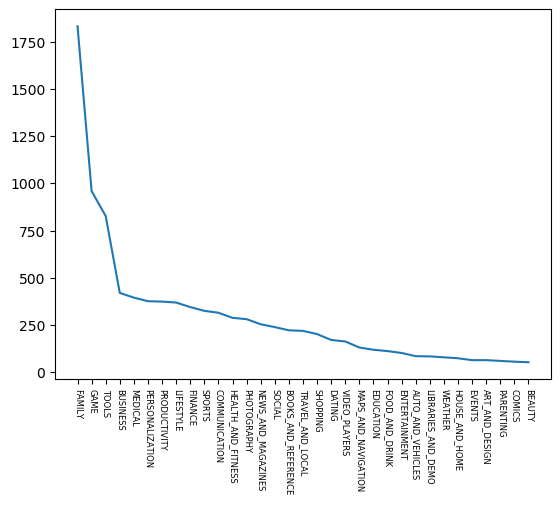

In [6]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

num_categories = len(apps['Category'].unique())
print('Number of categories = ', num_categories)

num_apps_in_category = apps['Category'].value_counts().sort_values(ascending=False)

#print("count", num_apps_in_category.values)
#print(num_apps_in_category.index)

plt.rc('xtick', labelsize=6)
plt.xticks( rotation=270)
plt.plot(num_apps_in_category.index, num_apps_in_category.values, scalex = True)

plt.show()



Using matplot lib, I have used a line graph to visually represent the different categories and their values, with entertainment apps for games and family use centered apps being more popular than other categories

## 4. Distribution of app ratings
<p>After having witnessed the market share for each category of apps, let's see how all these apps perform on an average. App ratings (on a scale of 1 to 5) impact the discoverability, conversion of apps as well as the company's overall brand image. Ratings are a key performance indicator of an app.</p>
<p>Add Histogram plot to visualize the distribution of app ratings</p>

Average app rating =  4.173243045387994


Text(0.5, 0, 'Rating')

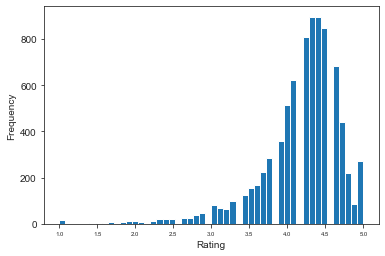

In [21]:
# Overall Average rating of apps
avg_app_rating = apps['Rating'].mean()
print('Average app rating = ', avg_app_rating)

# Distribution of apps according to their ratings using histogram. Write proper x axis and y axis labels.

x = apps["Rating"]
plt.hist(x, bins = 50)
plt.ylabel("Frequency")
plt.xlabel("Rating")


The Histogram shows the frequency of ratings of the different apps with the highest rating being close to 4.5 and the lowest being 0

## 5. Size and price of an app
<p>Let's now examine app size and app price. For size, if the mobile app is too large, it may be difficult and/or expensive for users to download. Lengthy download times could turn users off before they even experience your mobile app. Plus, each user's device has a finite amount of disk space. For price, some users expect their apps to be free or inexpensive. These problems compound if the developing world is part of your target market; especially due to internet speeds, earning power and exchange rates.</p>
<p>How can we effectively come up with strategies to size and price our app?</p>
<ul>
<li>Does the size of an app affect its rating? </li>
<li>Do users really care about system-heavy apps or do they prefer light-weighted apps? </li>
<li>Does the price of an app affect its rating? </li>
<li>Do users always prefer free/cheaper apps over paid apps? What price range do majoriy of apps fall into?</li>
</ul>

In [8]:
!pip install seaborn

You are using pip version 18.1, however version 19.2.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


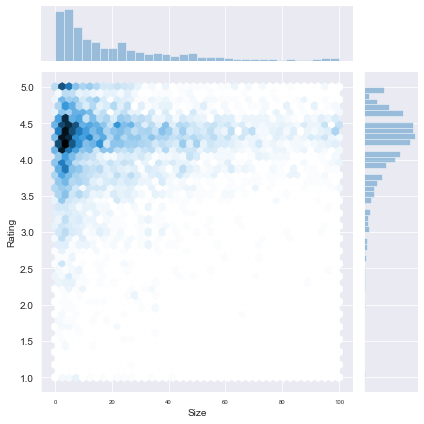

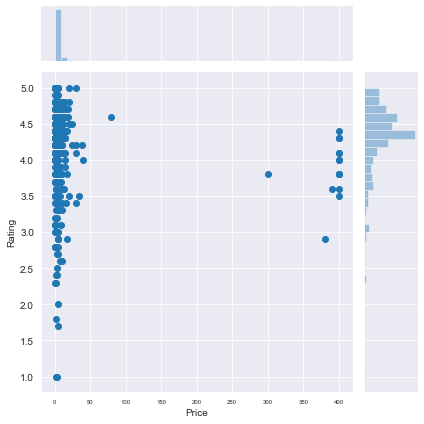

In [9]:
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

# Subset for categories with at least 250 apps
large_categories = apps.groupby('Category').filter(lambda x: len(x) >= 250).reset_index()

# Plot size vs. rating
sns.jointplot(x = 'Size', y = 'Rating', data = large_categories, kind = 'hex')

# Subset for paid apps only
paid_apps = apps[apps['Type']=='Paid']

# Plot price vs. rating
sns.jointplot(x = 'Price', y = 'Rating', data = paid_apps)

Here we plot the graph of the relation between the rating and the size of an app vs the rating and price of the app and the is a clear relation between cheaper and smaller apps having a higher rating as compared to more expensive and larger onnes as they tax more of the phones memory and the persons money

## 6. Relation between app category and app price
<p>So now comes the hard part. How are companies and developers supposed to make ends meet? What monetization strategies can companies use to maximize profit? The costs of apps are largely based on features, complexity, and platform.</p>
<p>There are many factors to consider when selecting the right pricing strategy for your mobile app. It is important to consider the willingness of your customer to pay for your app. A wrong price could break the deal before the download even happens. Potential customers could be turned off by what they perceive to be a shocking cost, or they might delete an app they’ve downloaded after receiving too many ads or simply not getting their money's worth.</p>
<p>Different categories demand different price ranges. Some apps that are simple and used daily, like the calculator app, should probably be kept free. However, it would make sense to charge for a highly-specialized medical app that diagnoses diabetic patients.
<ul>
<li>What is the maximum price for GAME category. What is the average price of paid GAME category? </li>
<ul>

Maximum Price for GAME category:

Unnamed: 0                           4203
App               The World Ends With You
Category                             GAME
Rating                                4.6
Reviews                              4108
Size                                   13
Installs                            10000
Type                                 Paid
Price                               17.99
Content Rating               Everyone 10+
Genres                             Arcade
Last Updated            December 14, 2015
Current Ver                         1.0.4
Android Ver                    4.0 and up
Name: 3332, dtype: object

Average Price for paid GAME category:
3.46719512195122


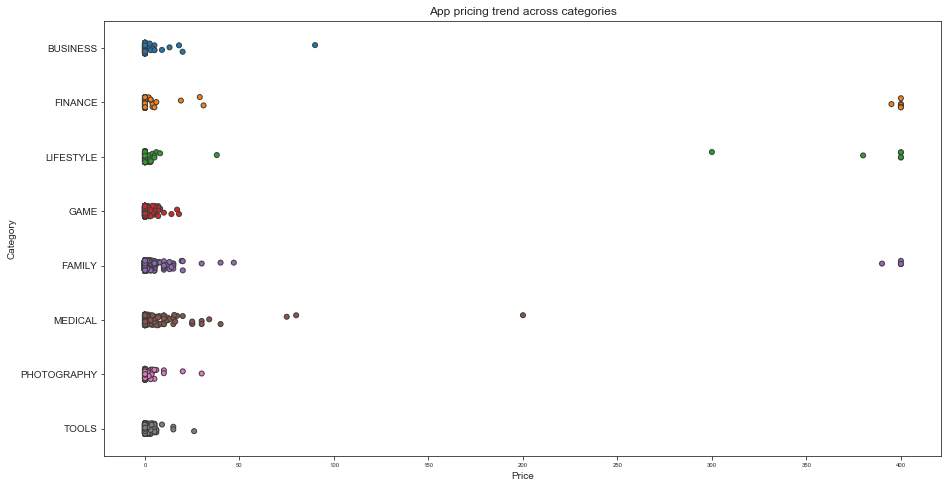

In [18]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
# Select a few popular app categories
popularCategory = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]
gameCategory = apps[apps.Category.isin(['GAME'])]

# Examine and plot the price trend for the above categories
ax = sns.stripplot(x='Price', y='Category', data=popularCategory,
                   jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

# Examine GAME Category. What is the maximum price for GAME category. What is the average price of paid GAME category?
Max_Game_Price = gameCategory.loc[Game_Cat['Price'].idxmax()]
Avg_Game_Price = gameCategory.loc[:,'Price'][Game_Cat['Type']=='Paid'].mean()
print('Maximum Price for GAME category:\n')
print(Max_Game_Price)
print('\nAverage Price for paid GAME category:')
print(Avg_Game_Price)

From the plot we can see that all the categories displayed have more free/low priced apps as comared to more costly apps, where as some categories such as tools dont have expensive apps altogether perhaps from lack of downloads. As far as games are concerned theye mostly seem to be free with a few of them being paid apps but still on the cheaper end of the scale

## 7. Filter out "junk" apps
<p>It looks like a bunch of the really expensive apps are "junk" apps. That is, apps that don't really have a purpose. Some app developer may create an app called <em>I Am Rich Premium</em> or <em>most expensive app (H)</em> just for a joke or to test their app development skills. Some developers even do this with malicious intent and try to make money by hoping people accidentally click purchase on their app in the store.</p>
<p>Let's filter out these junk apps and re-do our visualization.

Junk Apps:

       Category                                App   Price
3327     FAMILY             most expensive app (H)  399.99
3465  LIFESTYLE                         💎 I'm rich  399.99
3469  LIFESTYLE           I'm Rich - Trump Edition  400.00
4396  LIFESTYLE                          I am rich  399.99
4398     FAMILY                     I am Rich Plus  399.99
4399  LIFESTYLE                      I am rich VIP  299.99
4400    FINANCE                  I Am Rich Premium  399.99
4401  LIFESTYLE                I am extremely Rich  379.99
4402    FINANCE                         I am Rich!  399.99
4403    FINANCE                 I am rich(premium)  399.99
4406     FAMILY                      I Am Rich Pro  399.99
4408    FINANCE     I am rich (Most expensive app)  399.99
4410     FAMILY                          I Am Rich  389.99
4413    FINANCE                          I am Rich  399.99
4417    FINANCE                 I AM RICH PRO PLUS  399.99
8577    MEDICAL                       EP Coo

Text(0.5, 1.0, 'App pricing trend across categories with Authentic Apps')

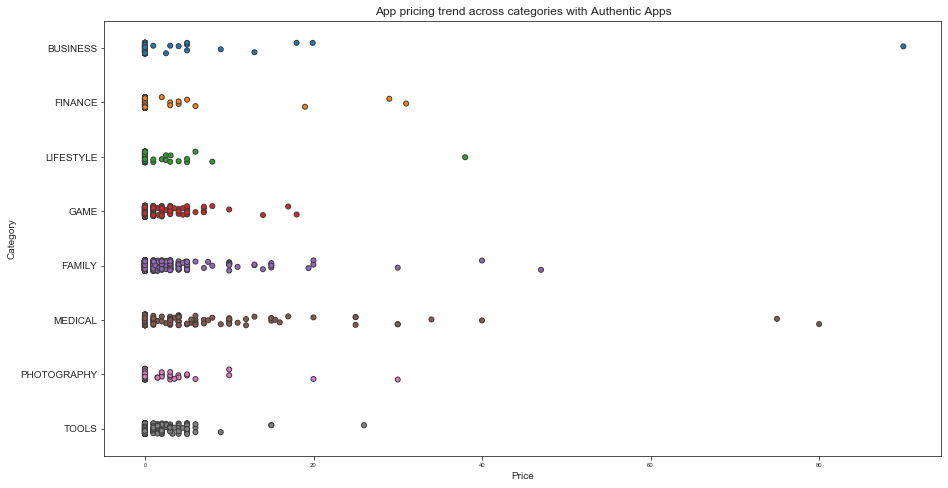

In [19]:
# Select a few popular app categories
popularCategory = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Category, Name and Price of apps priced above $100 which will be considered as Junk apps.
Junk_apps = popular_app_cats[['Category','App','Price']][popular_app_cats['Price']>100]
print('Junk Apps:\n')
print(Junk_apps)
# Select apps priced below $100 which will be considered as authentic apps.
Authentic_apps = popular_app_cats[['Category','App','Price']][popular_app_cats['Price']<100]
print('\nAuthentic Apps:\n')
print(Authentic_apps)

# Examine and visualize price vs category with the authentic apps. You can use strip  plot or box plot
ax = sns.stripplot(x="Price", y="Category" ,data=Authentic_apps,
                   jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories with Authentic Apps')

After removing the "Junk Apps" we can see thata there are a lot more apps on the more expensive side of the scale as compared to what we saw in the previous example. Here we can also see that there are a lot more apps that arent free as well

## 8. Popularity of paid apps vs free apps
<p>For apps in the Play Store today, there are five types of pricing strategies: free, freemium, paid, paymium, and subscription. Let's focus on free and paid apps only. Some characteristics of free apps are:</p>
<ul>
<li>Free to download.</li>
<li>Main source of income often comes from advertisements.</li>
<li>Often created by companies that have other products and the app serves as an extension of those products.</li>
<li>Can serve as a tool for customer retention, communication, and customer service.</li>
</ul>
<p>Some characteristics of paid apps are:</p>
<ul>
<li>Users are asked to pay once for the app to download and use it.</li>
<li>The user can't really get a feel for the app before buying it.</li>
</ul>
<p>Are paid apps are installed as much as free apps?

In [ ]:
!pip install plotly

In [14]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

trace0 = go.Box(
    # Data for paid apps
    y=apps['Installs'][apps['Type']=='Paid'],
    name = 'Paid'
)

trace1 = go.Box(
    # Data for free apps
    y=apps['Installs'][apps['Type']=='Free'],
    name = 'Free'
)

layout = go.Layout(
    title = "Number of downloads of paid apps vs. free apps",
    yaxis = dict(
        type = 'log',
        autorange = True
    )
)

# Add trace0 and trace1 to a list for plotting
data = [trace0,trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

Here we see a rather predicatble trend in the number of downloads between paid versus free apps, where the free applications have much higher download numbers as compared to non-free applications 

## 9. Sentiment analysis of user reviews
<p>Mining user review data to determine how people feel about your product, brand, or service can be done using a technique called sentiment analysis. User reviews for apps can be analyzed to identify if the mood is positive, negative or neutral about that app. For example, positive words in an app review might include words such as 'amazing', 'friendly', 'good', 'great', and 'love'. Negative words might be words like 'malware', 'hate', 'problem', 'refund', and 'incompetent'.</p>
<p>Sentiment polarity defines sentiment with a range from +1 to -1 (+1 being positive, -1 being negative and 0 being neutral)</p>
<p>What is the sentiment trend of user reviews for paid and free apps?</p>


Text(0.5, 1.0, 'Sentiment Polarity Distribution')

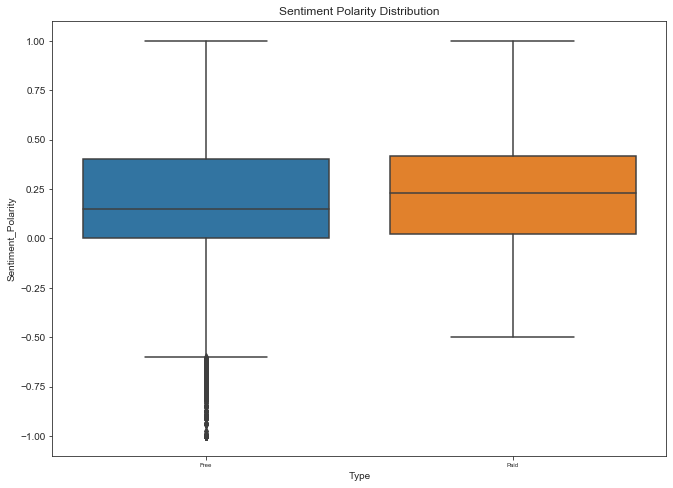

In [15]:
# Load user_reviews.csv
reviews_df = pd.read_csv('datasets/user_reviews.csv')

# Join and merge the two dataframe
merged_df = pd.merge(apps,reviews_df, on = 'App', how = "inner")

# Drop NA values from Sentiment and Translated_Review columns
merged_df = merged_df.dropna(subset=['Sentiment', 'Translated_Review'])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', data = merged_df)
ax.set_title('Sentiment Polarity Distribution')

From the above figure we can understand that the paid apps have clearly had a relativly better response as compared to the free apps.